In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

# Parte 1: Decamiento radioactivo
##1. Resolver la siguiente ecuacion difirencial, empleando el metodo de Euler, para ello debera consultar en una inteligencia artificial el metodo de Euler, también deberá generar el código en markdown con la explicación del método y las deducciones. 

\begin{equation}
\frac{\mathrm{d}N}{\mathrm{d}t}=-λ N
\end{equation}




### 1.1 Método de Euler

El método de Euler es un método numérico simple para aproximar la solución de una ecuación diferencial ordinaria (EDO) de primer orden de la forma $y' = f(x,y)$, donde $y$ es la función desconocida de $x$ y $f$ es una función dada. El método consiste en aproximar la curva $y(x)$ por una secuencia de segmentos de recta, donde cada segmento está definido por la pendiente de la curva en un punto específico. El método lleva el nombre del matemático suizo Leonhard Euler, quien lo describió por primera vez en el siglo XVIII.

### Deducción del método de Euler

Para deducir el método de Euler, consideremos la siguiente EDO de primer orden:

$$y' = f(x,y)$$

donde $y(x)$ es la función desconocida de $x$, y $f(x,y)$ es una función dada. El objetivo es aproximar la solución de esta EDO usando un método numérico.

Para hacer esto, comencemos con la definición de la derivada:

$$y'(x) = \lim_{h \to 0} \frac{y(x+h) - y(x)}{h}$$

donde $h$ es un número pequeño, y $y(x+h)$ es el valor de la función desconocida $y$ a una pequeña distancia $h$ de $x$.

Ahora, aproximemos la curva $y(x)$ por una secuencia de segmentos de recta, donde cada segmento tiene una pendiente igual a la derivada en un punto específico. Denotemos el valor de la función desconocida en el i-ésimo punto por $y_i$, y el valor correspondiente de $x$ por $x_i$. Entonces, la pendiente del segmento de recta que conecta el i-ésimo y (i+1)-ésimo puntos es:

$$m_i = \frac{y_{i+1} - y_i}{x_{i+1} - x_i}$$

Para aproximar el valor de $y_{i+1}$, podemos usar la pendiente del segmento de recta y el valor de $y_i$:

$$y_{i+1} = y_i + m_i (x_{i+1} - x_i)$$

Para encontrar la pendiente $m_i$, podemos usar la definición de la derivada y establecer $h = x_{i+1} - x_i$:

$$m_i = y'(x_i) = \lim_{h \to 0} \frac{y(x_i+h) - y(x_i)}{h}$$

Aproximando el valor de $y(x_i+h)$ por la función lineal $y_i + m_i h$, tenemos:

$$m_i = \frac{y_i + m_i h - y_i}{h}$$

Resolviendo para $m_i$, obtenemos:

$$m_i = f(x_i,y_i)$$

Esto significa que podemos aproximar el valor de $y_{i+1}$ por la siguiente fórmula:

$$y_{i+1} = y_i + h f(x_i,y_i)$$

Esta es la fórmula del método de Euler para aproximar la solución de una EDO de primer orden.

### Usando el método de Euler

Para usar el método de Euler, necesitamos especificar un valor inicial $y_0$ para la función desconocida $y(x)$ en $x = x_0$. Luego, podemos aplicar la fórmula del método de Euler iterativamente para aproximar el valor de $y$ en puntos sucesivos $x_1, x_2, \ldots, x_n$:

$$y_{i+1} = y_i + h f(x_i,y_i)$$

donde $h = x_{i+1} - x_i$ es el tamaño del paso, que es un parámetro de entrada del método.

Es importante tener en cuenta que la precisión de la aproximación depende del tamaño del paso $h$. Si el tamaño del paso es demasiado grande, la aproximación puede ser inexacta. Si el tamaño del paso es demasiado pequeño, el cálculo puede ser computacionalmente costoso.

Por lo tanto, es importante elegir un tamaño de paso adecuado para equilibrar la precisión y la eficiencia computacional.

### Ejemplo de aplicación del método de Euler

Consideremos la siguiente EDO de primer orden:

$$y' = -2xy$$

con la condición inicial $y(0) = 1$. El objetivo es aproximar la solución de esta EDO en el intervalo $0 \leq x \leq 1$ usando el método de Euler con un tamaño de paso de $h = 0.1$.

Usando la fórmula del método de Euler, podemos iterar para encontrar los valores aproximados de $y$ en los puntos sucesivos $x_1, x_2, \ldots, x_{10}$:

$$\begin{aligned}
y_1 &= y_0 + h f(x_0,y_0) = 1 + 0.1(-2 \cdot 0 \cdot 1) = 1 \\
y_2 &= y_1 + h f(x_1,y_1) = 1 + 0.1(-2 \cdot 0.1 \cdot 1) = 0.8 \\
y_3 &= y_2 + h f(x_2,y_2) = 0.8 + 0.1(-2 \cdot 0.2 \cdot 0.8) = 0.64 \\
\vdots \\
y_{10} &= y_9 + h f(x_9,y_9) = 0.0237
\end{aligned}$$

Por lo tanto, la aproximación de la solución en el punto $x = 1$ es $y(1) \approx 0.0237$.

Es importante tener en cuenta que la solución exacta de esta EDO es $y(x) = e^{-x^2}$, por lo que podemos comparar la solución aproximada del método de Euler con la solución exacta. En este caso, podemos ver que la aproximación es bastante buena, a pesar de que el tamaño del paso es relativamente grande.

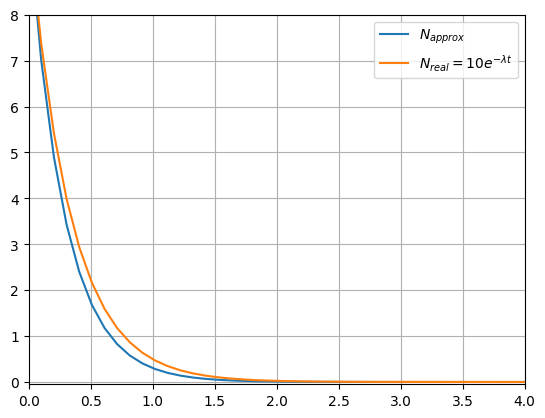

In [17]:
#Ejemplo de aplicacion del Metodo de Euler:

# Definamos la condicion inicial y los parametros del problema:
λ=3
a_=0
b_=5
N0=10
n_points=50

t=np.linspace(a_,b_,n_points) # Dominio de la funcion respuesta de la edo
h=(b_-a_)/n_points

N_approx=np.zeros(n_points)
N_approx[0]=N0

# A continuacion definimos la funcion del miembro derecho de la edo dada:
f=lambda λ,y:-λ*y


for i in range(0,len(t)-1):
  N_approx[i+1] = N_approx[i] + f(λ,N_approx[i])*h
  

N_real = N0*np.exp((-λ)*t)


plt.plot(t,N_approx,label='$ N_{approx} $')
plt.plot(t,N_real,label='$ N_{real}=$'f'{N0}''$e^{-λt}  $')
plt.xlim(0,4)
plt.ylim(-0.05,8)
plt.grid()
plt.legend()


<ipython-input-28-2e9949da65d2>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([y_dot, -b*y_dot/m - k*y/m])


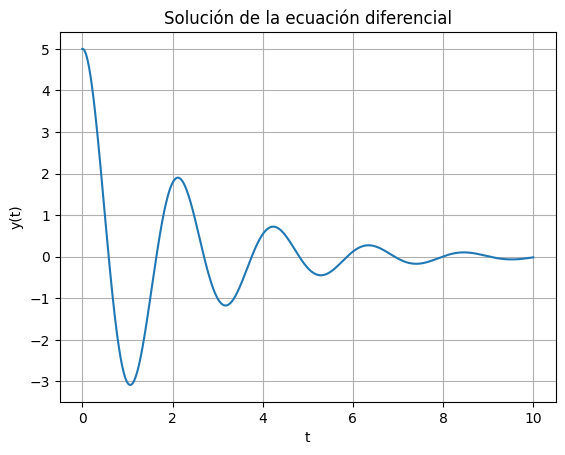

(1001, 2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
m = np.array([1.0])
b = 1
k = 9.0
w_sq = k/m
eta = b/m

# Condiciones iniciales
y0 = np.array([5.0, 0.0])

# Definir la ecuación diferencial como un sistema de dos ecuaciones de primer orden
def f(t, Y):
    y, y_dot = Y
    return np.array([y_dot, -b*y_dot/m - k*y/m])

# Método de Euler para resolver el sistema de ecuaciones de primer orden
def euler(f, t0, Y0, tf, h):
    t = np.arange(t0, tf+h, h)
    Y = np.zeros((len(t), len(Y0)))
    Y[0] = Y0
    for i in range(1, len(t)):
        Y[i] = Y[i-1] + h*f(t[i-1], Y[i-1])
    return t, Y

# Resolver la ecuación diferencial
t0 = 0
tf = 10
h = 0.01
t, Y = euler(f, t0, y0, tf, h)

# Graficar la solución
y = Y[:, 0]
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solución de la ecuación diferencial')
plt.grid(True)
plt.show()

np.shape(Y)



# Parte 2: Oscilador armónico 
##1. Resolver la siguiente ecuacion difirencial, empleando el metodo de Euler.

\begin{equation}   
m \frac{d^2x}{dt^2} + b\frac{dx}{dt}+kx =0 
\end{equation}


\begin{equation}   
a = \frac{d^2x}{dt^2} ,    v =\frac{dx}{dt}
\end{equation}






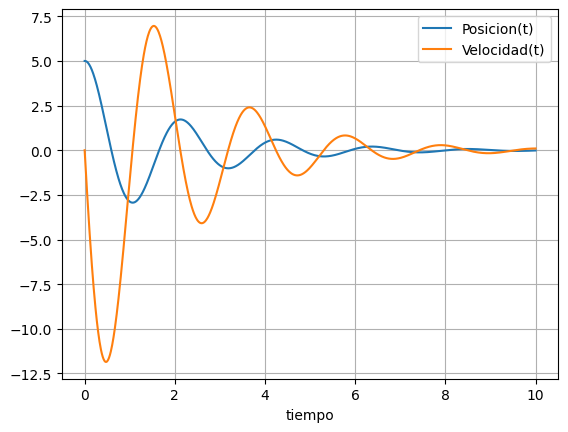

In [6]:
# Definir los parametros:
m=1
b=1
k=9
x0=5
v0=0
w_sq=k/m
η=b/m

Npoints=1000

a_ = 0
b_ = 10

t=np.linspace(a_,b_,Npoints)
dt=(b_-a_)/Npoints

X=np.zeros_like(t)    # Array de almacenamiento de los valores de la funcion de posicion 
X[0]=y0

V=np.zeros_like(t)    # Array de almacenamiento de los valores de la funcion de velocidad 
V[0]=v0


f1 = lambda t,v: v # funcion f(t,X)
f2 = lambda t,y,v: -(w_sq*y +η*v)


for i in range (0,len(t)-1):

  X[i+1]=X[i]+ f1(t[i],V[i])*dt
  V[i+1]=V[i]+f2(t[i],Y[i+1],V[i])*dt  # Para la parte de la velocidad asociada con la dependencia en la posicion, deberiamos considerar la i+1 esima posicion


plt.plot(t,X,label='Posicion(t)')
plt.plot(t,V,label='Velocidad(t)')
plt.xlabel('tiempo')
plt.grid()
plt.legend()


***Respuesta proporcionada por ChatGPT para el mismo problema del oscilador armónico amortiguado:***

*Prompts:*


*  Sabes si es posible aplicar el metodo de Euler para una ecuacion diferencial 
   de segundo orden?

   

*   Necesito que resuelvas una ecuación diferencial de segundo orden  
  especifica, condicionada bajo ciertos parámetros que te ingrese, de modo que tu respuesta sea un codigo implementable en python

* my''+by'+ky=0; condiciones iniciales: y(0)= 5, y'(0)=0  ; parametros: m=1, b=0, k=9, w_sq=k/m,η=b/m.  



```
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
m = np.array([1.0])
b = 1
k = 9.0
w_sq = k/m
eta = b/m

# Condiciones iniciales
y0 = np.array([5.0, 0.0])

# Definir la ecuación diferencial como un sistema de dos ecuaciones de primer orden
def f(t, Y):
    y, y_dot = Y
    return np.array([y_dot, -b*y_dot/m - k*y/m])

# Método de Euler para resolver el sistema de ecuaciones de primer orden
def euler(f, t0, Y0, tf, h):
    t = np.arange(t0, tf+h, h)
    Y = np.zeros((len(t), len(Y0)))
    Y[0] = Y0
    for i in range(1, len(t)):
        Y[i] = Y[i-1] + h*f(t[i-1], Y[i-1])
    return t, Y

# Resolver la ecuación diferencial
t0 = 0
tf = 10
h = 0.01
t, Y = euler(f, t0, y0, tf, h)

# Graficar la solución
y = Y[:, 0]
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solución de la ecuación diferencial')
plt.grid(True)
plt.show()


```

       


<ipython-input-7-5728b01ee76b>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([y_dot, -b*y_dot/m - k*y/m])


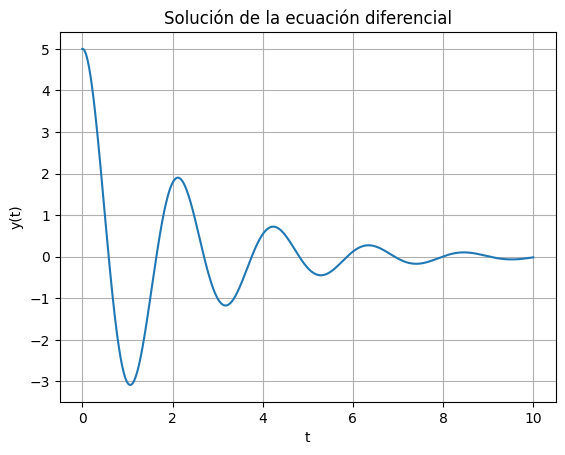

In [7]:
#Implementacion del codigo brindado por chatGPT:

import numpy as np
import matplotlib.pyplot as plt

# Parámetros
m = np.array([1.0])
b = 1
k = 9.0
w_sq = k/m
eta = b/m

# Condiciones iniciales
y0 = np.array([5.0, 0.0])

# Definir la ecuación diferencial como un sistema de dos ecuaciones de primer orden
def f(t, Y):
    y, y_dot = Y
    return np.array([y_dot, -b*y_dot/m - k*y/m])

# Método de Euler para resolver el sistema de ecuaciones de primer orden
def euler(f, t0, Y0, tf, h):
    t = np.arange(t0, tf+h, h)
    Y = np.zeros((len(t), len(Y0)))
    Y[0] = Y0
    for i in range(1, len(t)):
        Y[i] = Y[i-1] + h*f(t[i-1], Y[i-1])
    return t, Y

# Resolver la ecuación diferencial
t0 = 0
tf = 10
h = 0.01
t, Y = euler(f, t0, y0, tf, h)

# Graficar la solución
y = Y[:, 0]
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solución de la ecuación diferencial')
plt.grid(True)
plt.show()